In [1]:
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as patches



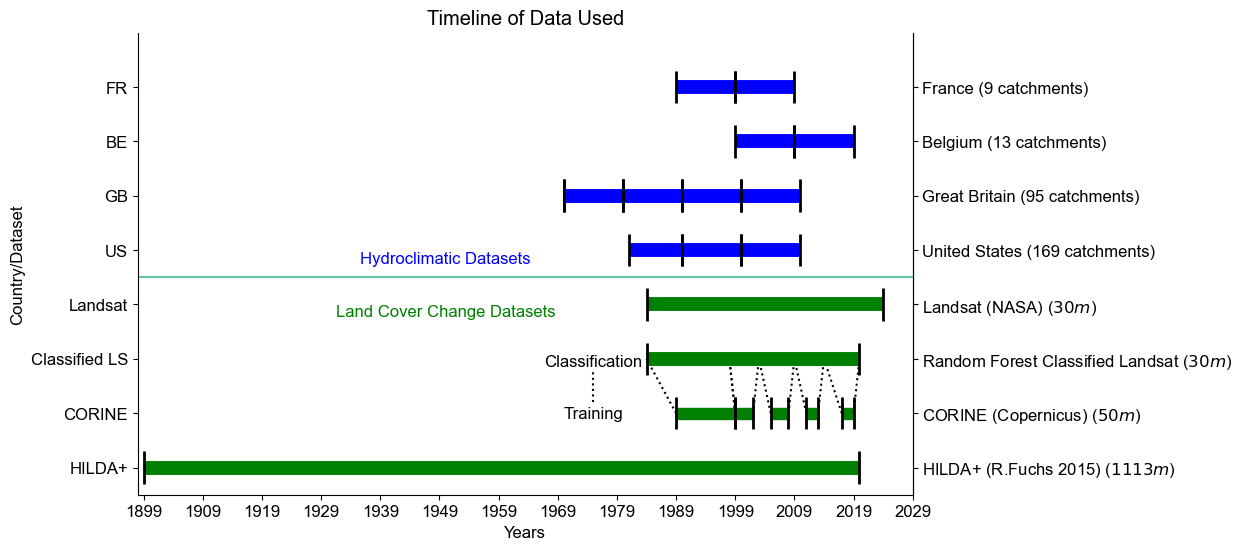

In [2]:
# Set the font family and size
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

# Set the color palette
sns.set_palette('Set2')
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
# Create a list of country-decade pairs
decade_pairs = [('FR', '1989 - 1998'), ('FR', '1999 - 2008'),
                ('BE', '1999 - 2008'), ('BE', '2009 - 2018'),
                ('GB', '1970 - 1979'), ('GB', '1980 - 1989'),
                ('GB', '1990 - 1999'), ('GB', '2000 - 2009'),
                ('US', '1981 - 1989'), ('US', '1990 - 1999'),
                ('US', '2000 - 2009'),
                ('CORINE', '1989 - 1998'), ('CORINE', '1999 - 2001'),('CORINE', '2005 - 2007'),
                ('CORINE', '2011- 2012'), ('CORINE', '2017 - 2018'), ('GB', '1970 - 1979')]

# Add Landsat and HILDA to the y-axis
decade_pairs.append(('Landsat', '1984 - 2023'))
decade_pairs.append(('Classified LS', '1984 - 2019'))

decade_pairs.append(('HILDA+', '1899 - 2019'))

# Update the decade_pairs list
# decade_pairs.insert(4, ('CORINE', '1984 - 2000'))

# Update the y_coords dictionary
y_coords = {'FR': 8, 'BE': 7, 'GB': 6, 'US': 5,  'Landsat': 4, 'Classified LS':3, 'CORINE': 2,'HILDA+': 1}

# Update the colors dictionary
colors = {'FR': 'blue', 'BE': 'blue', 'GB': 'blue', 'US': 'blue', 'CORINE': 'green', 'Classified LS':'green','Landsat': 'green', 'HILDA+': 'green'}

# Set the number of decades per item
decades_per_item = 4

sd_i =[1984,1998,2003,2009,2014]

ed_i =[1998,2003,2009,2014,2020]


n=0

for i, (item, decade) in enumerate(decade_pairs):
    # Get the y-coordinate for the item
    y = y_coords[item]
    
    # Get the start and end indices for the bar
    start = y - 0.3
    end = y + 0.3
    
    # Get the x-coordinates for the start and end of the bar
    x_start = int(decade[:4])
    x_end = int(decade[-4:]) + 1
    
    # Plot the horizontal bar with the corresponding color
    if item == 'CORINE':
        
        ax.fill_betweenx([start + 0.4, end - 0.4], x_start, x_end, color=colors[item])
        
        # Get the tip location of the axvline for CORINE
        
        # Plot a dotted line from the tip location to the center of the Random Forest Classified Landsat span
        ax.plot([x_start, sd_i[n]], [y, 3], linestyle='dotted', color='black')
        ax.plot([x_end, ed_i[n]], [y, 3], linestyle='dotted', color='black')
        n+=1
    else:
        ax.hlines(y, x_start, x_end, linewidth=10, color=colors[item])
    
    ax.vlines(x_start, start, end, linewidth=2, color='black')
    ax.vlines(x_end, start, end, linewidth=2, color='black')

# Set the x-axis limits
ax.set_xlim([1898, 2023])

# Set the y-axis limits with an extended range
ax.set_ylim([0.5, 9])

# Add the hydroclimatic datasets text
ax.text(1950, 2.7+2, 'Hydroclimatic Datasets', ha='center', va='bottom',c='b')

# Add the hydroclimatic datasets text
ax.text(1975, 1.85, 'Classification\n\n\nTraining', ha='center', va='bottom',c='k')

ax.plot([1975, 1975], [2.2,2.8], linestyle='dotted', color='black')

# Add the land cover change datasets text
ax.text(1950, 2+2, 'Land Cover Change Datasets', ha='center', va='top', c='g')


# Adjust the y-axis tick locations and labels
ax.set_yticks(np.arange(1, 9))
ax.set_yticklabels(list(y_coords.keys())[::-1])

# Set the x-axis tick locations and labels
years = np.arange(1899, 2030, 10)
ax.set_xticks(years)

ax.axhline(4.5)
# Set the axis labels
ax.set_xlabel('Years')
ax.set_ylabel('Country/Dataset')

# Add a title
ax.set_title('Timeline of Data Used')

ax_sec = ax.secondary_yaxis('right')
ax_sec.set_yticks(np.arange(1, 9))
ax_sec.set_yticklabels(['France (9 catchments)', 'Belgium (13 catchments)', 'Great Britain (95 catchments)', 'United States (169 catchments)', 'Landsat (NASA) ($30m$)', 'Random Forest Classified Landsat ($30m$)', 'CORINE (Copernicus) ($50m$)','HILDA+ (R.Fuchs 2015) ($1113m$)'][::-1])

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines

NameError: name 'arrow_properties' is not defined

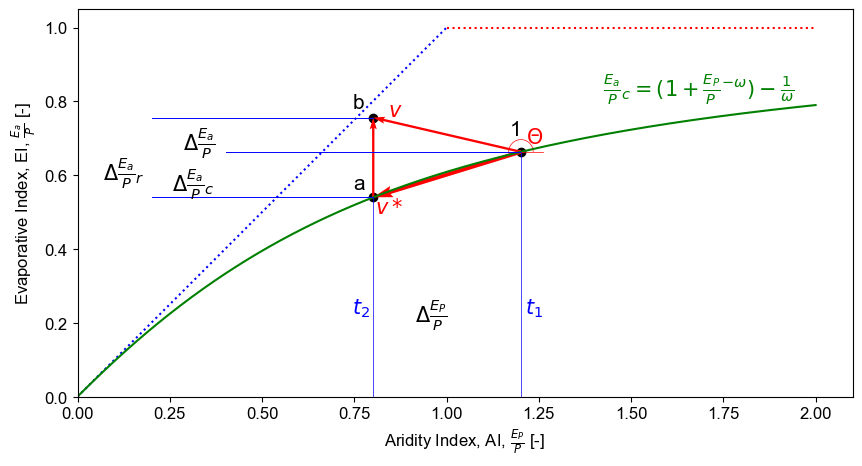

In [3]:

def w_function(AI, w):
    EI = 1 + AI - (1 + AI**w)**(1/w)
    return EI

fig,ax = plt.subplots(figsize=(10,6.18))

plt.plot([1, 2], [1,1], ls=':', c='r')
plt.plot([0, 1], [0,1], ls=':', c='b')
plt.ylabel(r'Evaporative Index, EI, $\frac{E_a}{P}$ [-]')
plt.xlabel(r'Aridity Index, AI, $\frac{E_P}{P}$ [-]')

plt.ylim(0)
plt.xlim(0)

x= np.linspace(0.001,2,1000)

y = w_function(x, 2.1)
plt.text(x[970], y[970]+0.1, r'$\frac{E_a}{P}_{c} = (1+\frac{E_P}{P}^{-\omega})-\frac{1}{\omega}$', color='g', ha='right', va='top', fontsize=15)

dot_1_x, dot_1_y = x[600], y[600]
dot_a_x, dot_a_y = x[400], y[400]
dot_b_x, dot_b_y = x[400], y[400]*1.4

line_mid_x1, line_mid_x2 = x[200],dot_1_x
line_top_x1, line_top_y = x[100], dot_b_y


plt.plot(x,y, label='$\frac{b}{P}$', c='g')

plt.scatter(dot_1_x, dot_1_y, c='k', label='1')
plt.scatter(dot_a_x, dot_a_y, c='k', label='a')
plt.scatter(dot_b_x, dot_b_y, c='k', label='b')

# Add labels near the points and lines
plt.text(dot_1_x, dot_1_y*1.05, '1', color='k', ha='right', va='bottom', fontsize=15)
plt.text(dot_a_x*0.97, dot_a_y*1.02, 'a', color='k', ha='right', va='bottom', fontsize=15)
plt.text(dot_b_x*0.97, dot_b_y*1.02, 'b', color='k', ha='right', va='bottom', fontsize=15)

plt.text(line_top_x1*0.9, 1.01*(dot_b_y+dot_a_y)/2, r'$\Delta\frac{E_a}{P}_{r}$', color='k', ha='right', va='top', fontsize=15)
plt.text((dot_1_x+dot_a_x)/2, dot_a_y/2, r'$\Delta\frac{E_P}{P}$', color='k', ha='right', va='top', fontsize=15)
plt.text(line_mid_x1*0.93, 1.04*(dot_1_y+dot_b_y)/2, r'$\Delta\frac{E_a}{P}$', color='k', ha='right', va='top', fontsize=15)
plt.text(line_mid_x1*0.93, 1.04*(dot_1_y+dot_a_y)/2, r'$\Delta\frac{E_a}{P}_{c}$', color='k', ha='right', va='top', fontsize=15)
plt.text(dot_a_x*1.1, dot_a_y, r'$v*$', color='r', ha='right', va='top', fontsize=15)
plt.text(dot_b_x*1.1, dot_b_y*1.06, r'$v$', color='r', ha='right', va='top', fontsize=15)
plt.text(dot_1_x*1.05, dot_1_y*1.1, r'$\Theta$', color='r', ha='right', va='top', fontsize=15)

plt.text(dot_1_x*1.05, dot_a_y/2, r'$t_1$', color='b', ha='right', va='top', fontsize=15)
plt.text(dot_a_x*0.99, dot_a_y/2, r'$t_2$', color='b', ha='right', va='top', fontsize=15)


plt.plot([line_mid_x1,line_mid_x2,], [dot_1_y, dot_1_y], c='b', lw=0.7)
plt.plot([line_top_x1,dot_b_x,], [dot_b_y, dot_b_y], c='b', lw=0.7)
plt.plot([line_top_x1,dot_b_x,], [dot_a_y, dot_a_y], c='b', lw=0.7)

plt.plot([dot_b_x,dot_b_x], [0, dot_a_y], c='b', lw=0.5)
plt.plot([dot_1_x,dot_1_x], [0, dot_1_y], c='b', lw=0.5)
plt.plot([dot_1_x,dot_1_x*1.05], [dot_1_y,dot_1_y], c='r', lw=0.5)

plt.quiver(dot_1_x, dot_1_y, dot_a_x - dot_1_x, dot_a_y - dot_1_y, angles='xy', scale_units='xy', scale=1, color='r', width=0.005)
plt.quiver(dot_a_x, dot_a_y, dot_b_x - dot_a_x, dot_b_y - dot_a_y, angles='xy', scale_units='xy', scale=1, color='r', width=0.003, linestyle='dashed')
plt.quiver(dot_1_x, dot_1_y, dot_b_x - dot_1_x, dot_b_y - dot_1_y, angles='xy', scale_units='xy', scale=1, color='r', width=0.003, linestyle='dashed')

# # Set aspect ratio to equal for the axes
ax.set_aspect('equal')

# # Define the center and radius of the arc
center = (dot_1_x, dot_1_y)
radius = dot_1_y*0.05

# # Create the arc
arc = patches.Arc(center, radius*2, radius*2, angle=0, theta2=200, linestyle='-', linewidth=0.5, color='r')

# # Add the arc to the plot
ax.add_patch(arc)

# arrow_properties = dict(facecolor='blue', edgecolor='black', arrowstyle='<->')
plt.annotate('', (line_top_x1, dot_b_y), (line_top_x1, dot_a_y*1.001), arrowprops=arrow_properties)
plt.annotate('', (line_mid_x1, dot_1_y), (line_mid_x1, dot_b_y*1.001), arrowprops=arrow_properties)
plt.annotate('', (line_mid_x1, dot_a_y), (line_mid_x1, dot_1_y*1.001), arrowprops=arrow_properties)
plt.annotate('', (dot_a_x, dot_a_y/2), (dot_1_x, dot_a_y/2),  arrowprops=arrow_properties)

plt.show()


In [5]:
df = pd.read_excel('../Outputs/Results/All_Data_With_Residuals.xlsx')

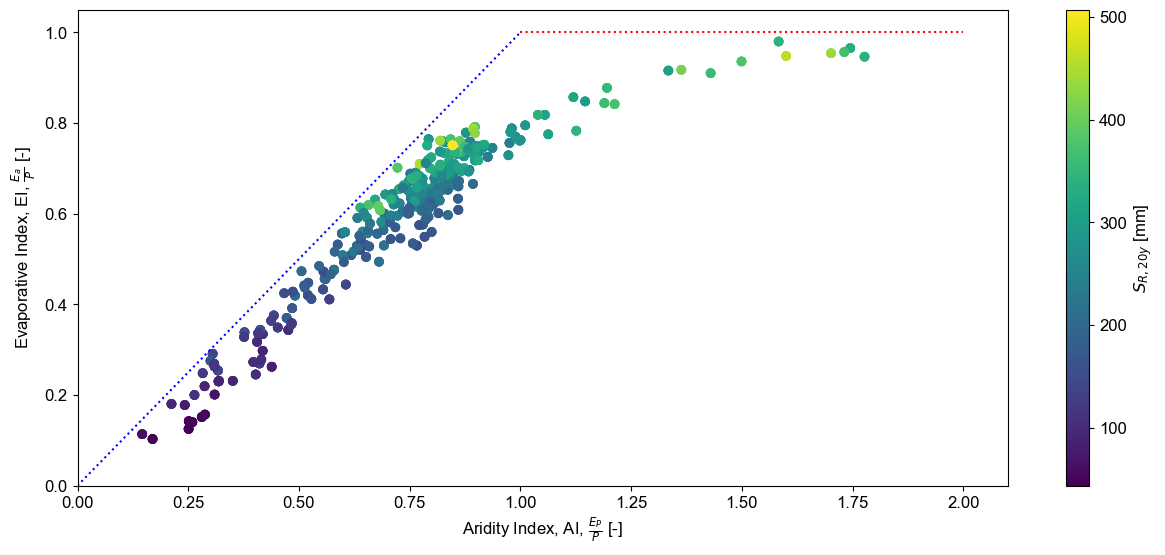

In [6]:
fig,ax = plt.subplots(figsize=(15,6.18))

plt.plot([1, 2], [1,1], ls=':', c='r')
plt.plot([0, 1], [0,1], ls=':', c='b')
plt.ylabel(r'Evaporative Index, EI, $\frac{E_a}{P}$ [-]')
plt.xlabel(r'Aridity Index, AI, $\frac{E_P}{P}$ [-]')

plt.ylim(0)
plt.xlim(0)

plt.scatter(df.LT_AI, df.LT_EI, c=df.LT_Sr)
plt.colorbar(label='$S_{R,20y}$ [mm]')

In [7]:
import matplotlib as mpl

Text(0.5, 1.0, 'Mean Decadal Values Colored by Their Respective Magnitudes in Residuals, n=653')

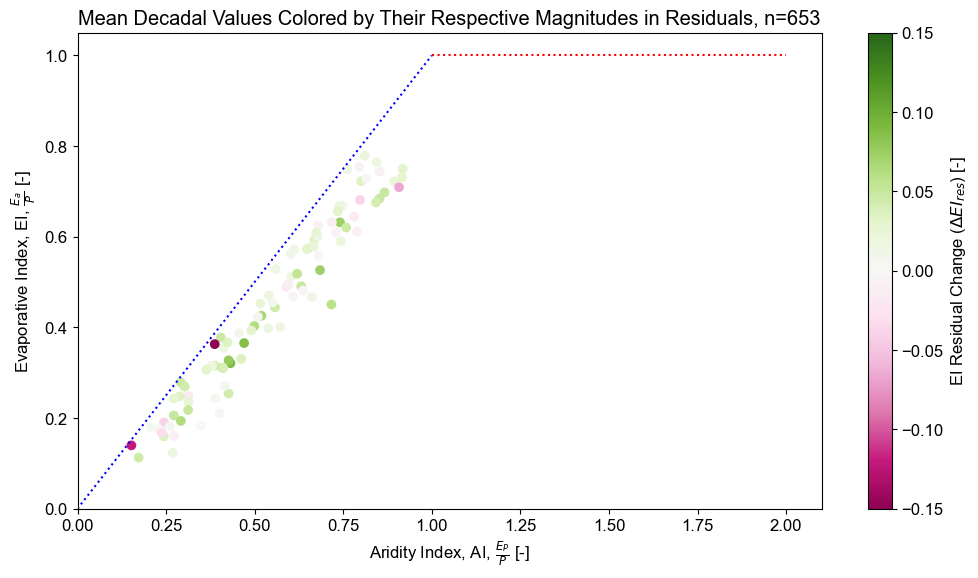

In [9]:
fig,ax = plt.subplots(figsize=(12,6.18))

plt.plot([1, 2], [1,1], ls=':', c='r')
plt.plot([0, 1], [0,1], ls=':', c='b')
plt.ylabel(r'Evaporative Index, EI, $\frac{E_a}{P}$ [-]')
plt.xlabel(r'Aridity Index, AI, $\frac{E_P}{P}$ [-]')

plt.ylim(0)
plt.xlim(0)

plt.scatter(df.AI_mean, df.EI_mean, c=df.dy_res.shift(2), cmap=mpl.colormaps['PiYG'], vmin=-0.15, vmax=0.15)
plt.colorbar(label='EI Residual Change ($\Delta EI_{res}$) [-]')
plt.title(f'Mean Decadal Values Colored by Their Respective Magnitudes in Residuals, n={len(df.dy_res.shift(1).dropna())}')

Text(0.5, 1.0, 'Mean Decadal Values Colored by Their Respective Magnitudes in Residuals, n=653')

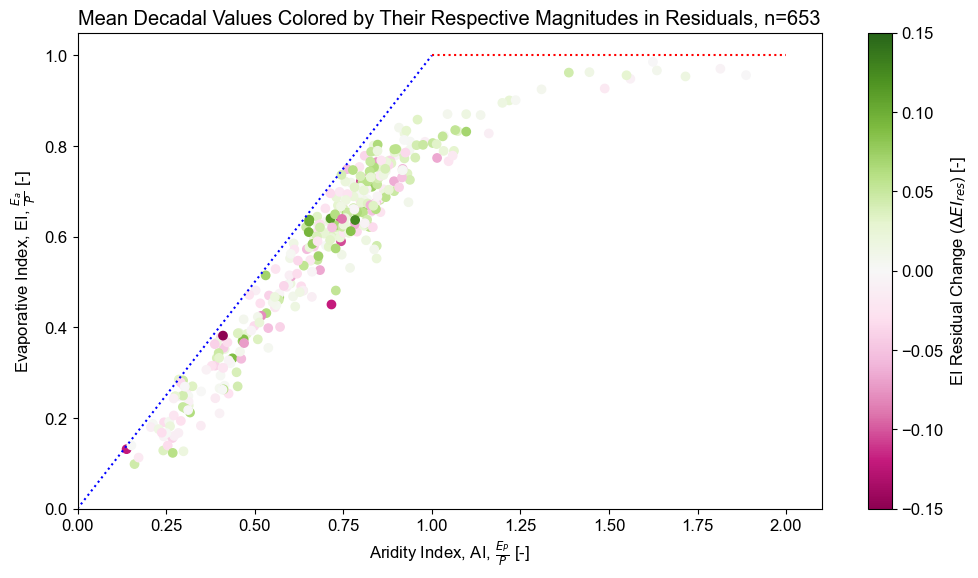

In [10]:
fig,ax = plt.subplots(figsize=(12,6.18))

plt.plot([1, 2], [1,1], ls=':', c='r')
plt.plot([0, 1], [0,1], ls=':', c='b')
plt.ylabel(r'Evaporative Index, EI, $\frac{E_a}{P}$ [-]')
plt.xlabel(r'Aridity Index, AI, $\frac{E_P}{P}$ [-]')

plt.ylim(0)
plt.xlim(0)

plt.scatter(df.AI_mean, df.EI_mean, c=df.dy_res.shift(1), cmap=mpl.colormaps['PiYG'], vmin=-0.15, vmax=0.15)
plt.colorbar(label='EI Residual Change ($\Delta EI_{res}$) [-]')
plt.title(f'Mean Decadal Values Colored by Their Respective Magnitudes in Residuals, n={len(df.dy_res.shift(1).dropna())}')

Text(0.5, 1.0, 'Mean Decadal Values Colored by Their Respective Magnitudes in Residuals, n=653')

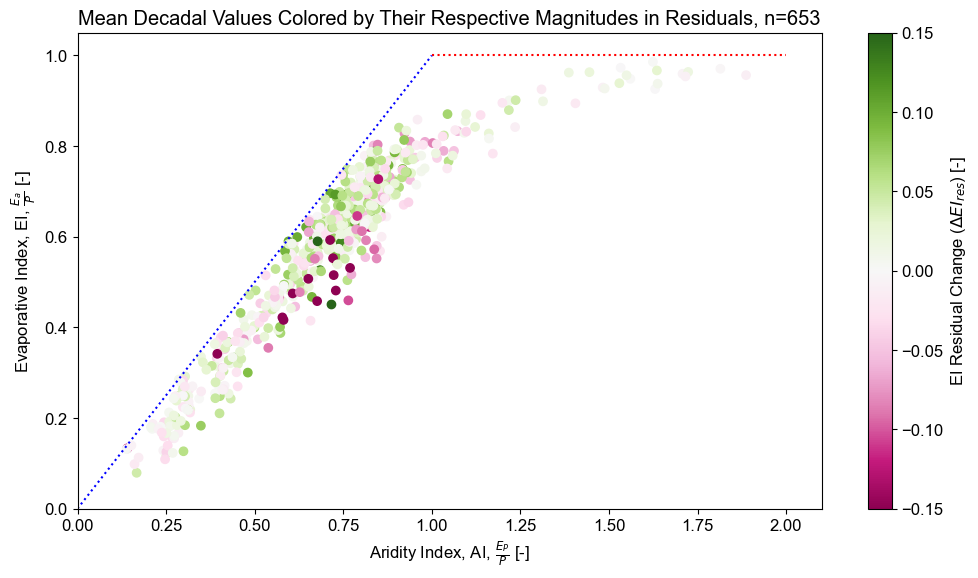

In [11]:
fig,ax = plt.subplots(figsize=(12,6.18))

plt.plot([1, 2], [1,1], ls=':', c='r')
plt.plot([0, 1], [0,1], ls=':', c='b')
plt.ylabel(r'Evaporative Index, EI, $\frac{E_a}{P}$ [-]')
plt.xlabel(r'Aridity Index, AI, $\frac{E_P}{P}$ [-]')

plt.ylim(0)
plt.xlim(0)

plt.scatter(df.AI_mean, df.EI_mean, c=df.dy_res.shift(0), cmap=mpl.colormaps['PiYG'], vmin=-0.15, vmax=0.15)
plt.colorbar(label='EI Residual Change ($\Delta EI_{res}$) [-]')
plt.title(f'Mean Decadal Values Colored by Their Respective Magnitudes in Residuals, n={len(df.dy_res.shift(1).dropna())}')

In [63]:
df.iloc[df.dy_res.idxmin(), :][['catchment', 'dy_res', 'image_date', 'Sr_mean','Sr_mean_diff_pct', 'Ep_mean_diff_pct', 'Pa_mean_diff_pct', 'EI_mean_diff_pct']]

catchment            La Chiers Carignan
dy_res                        -0.298265
image_date          2018-08-31 22:00:00
Sr_mean                      165.420224
Sr_mean_diff_pct              -0.232916
Ep_mean_diff_pct               0.001395
Pa_mean_diff_pct              -0.212001
EI_mean_diff_pct              -0.091762
Name: 2264, dtype: object

In [86]:
dfa = df.copy()
dfa = dfa.sort_values('dy_res')
dfa = dfa[['catchment', 'image_date', 'Sr_mean', 'Sr_mean_diff_pct', 'Pa_mean_diff_pct', 'EI_mean_diff', 'dy_res', 'dy_clim', 'dataset']][dfa.dataset=='Meuse'].iloc[:30,:]

{'whiskers': [<matplotlib.lines.Line2D at 0x1e8521292e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e852129df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8521299d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e851e590d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e8521224f0>],
 'means': []}

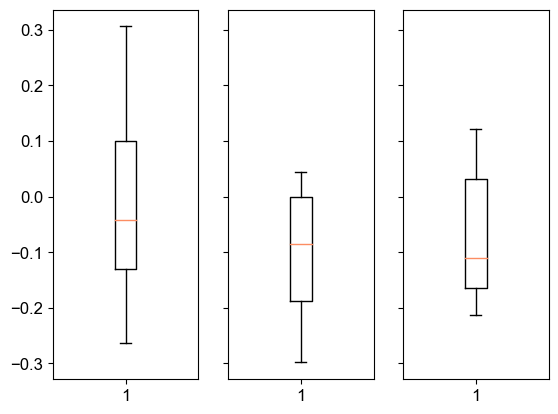

In [98]:
# plt.boxplot(
fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].boxplot(dfa.Sr_mean_diff_pct)
axs[1].boxplot(dfa.dy_res)
axs[2].boxplot(dfa.Pa_mean_diff_pct)

In [43]:
import numpy as np
from sklearn.metrics import mean_squared_error

def rmse_two_vars(df, var1, var2):
    dfm = df.dropna(subset=[var1, var2])
    mse = mean_squared_error(dfm[var1] , dfm[var2])
    rmse = np.sqrt(mse)
    print(f'rmse {var1} vs {var2}: {rmse}')


var1 = 'h_1_normalized'
var2 = 'r_1_normalized'
rmse_two_vars(df, var1, var2)

var1 = 'c_1_normalized'
var2 = 'r_1_normalized'
rmse_two_vars(df, var1, var2)

var1 = 'c_1_normalized'
var2 = 'h_1_normalized'
rmse_two_vars(df, var1, var2)

rmse h_1_normalized vs r_1_normalized: 0.05925753855616647
rmse c_1_normalized vs r_1_normalized: 0.04983790887614015
rmse c_1_normalized vs h_1_normalized: 0.029550281263402124


In [44]:
df['h_fsn_normalized'] = (df.h_4+df.h_5) / df.catchment_area
df['h_ag_normalized'] = (df.h_2 + df.h_3) / df.catchment_area

var1 = 'h_ag_normalized'
var2 = 'r_2_normalized'
rmse_two_vars(df, var1, var2)

var1 = 'c_2_normalized'
var2 = 'r_2_normalized'
rmse_two_vars(df, var1, var2)

var1 = 'c_2_normalized'
var2 = 'h_ag_normalized'
rmse_two_vars(df, var1, var2)

rmse h_ag_normalized vs r_2_normalized: 0.19345096645060572
rmse c_2_normalized vs r_2_normalized: 0.12131202781441704
rmse c_2_normalized vs h_ag_normalized: 0.1316462205335666


In [45]:
var1 = 'h_fsn_normalized'
var2 = 'r_3_normalized'
rmse_two_vars(df, var1, var2)

var1 = 'c_3_normalized'
var2 = 'r_3_normalized'
rmse_two_vars(df, var1, var2)

var1 = 'c_3_normalized'
var2 = 'h_fsn_normalized'
rmse_two_vars(df, var1, var2)

rmse h_fsn_normalized vs r_3_normalized: 0.19134457661653634
rmse c_3_normalized vs r_3_normalized: 0.15939742115697952
rmse c_3_normalized vs h_fsn_normalized: 0.1851364707974442
